In [4]:
%pip install plot-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
%matplotlib inline


features = ['age', 'acutephysiologyscore']
outcome = 'actualhospitalmortality'

data = pd.read_csv("../Decision_Trees_Training_UoSheffield/eicu_cohort_trees.csv")

# ---- Age - replace all values >89 with 91.5
data.replace({'age':'> 89'},91.5, inplace=True)
data['age'] = data['age'].astype(int) 
actualhospitalmortality = {'ALIVE':0, 'EXPIRED':1}
data.actualhospitalmortality = [actualhospitalmortality[item] for item in data.actualhospitalmortality]


x = data[features]# 2x
y = data[outcome]#1x

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42 ) 

# Boosting

Previously, we demonstrated that decision trees may have high “variance”. Their performance can vary widely given different samples of data. An algorithm that performs somewhat poorly at a task - such as simple decision tree - is sometimes referred to as a “weak learner”.

The premise of boosting is the combination of many weak learners to form a single “strong” learner. In a nutshell, boosting involves building a models iteratively. At each step we focus on the data on which we performed poorly.

In our context, the first step is to build a tree using the data. Next, we look at the data that we misclassified, and re-weight the data so that we really wanted to classify those observations correctly, at a cost of maybe getting some of the other data wrong this time. Let’s see how this works in practice.

To begin, we must first create a version of our dataset without NaNs - the type of boosting classifier we will be using is not able to deal with missing data.

**Task:** Create a version of the dataset with NaNs filled with -1.

In this case we know that our dataset canot be -1 so hopefully the model will pick this up as an error

In [3]:
# Fill missing data with -1
data_no_nans = data.fillna(-1)

x = data_no_nans[features]
y = data_no_nans[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

In [4]:
data_no_nans

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Female,48,86.40,27.5583,44,49,0,102.0,54.0,1.16,36.9,39.0,6.1,177.8
1,Female,59,66.60,15.0778,56,61,0,134.0,172.0,1.03,34.8,32.0,25.5,170.2
2,Male,31,66.80,2.7326,45,45,0,138.0,71.0,2.35,37.2,34.0,21.4,188.0
3,Female,51,77.10,0.1986,19,24,0,122.0,73.0,-1.00,36.8,26.0,-1.0,160.0
4,Female,48,63.40,1.7285,25,30,0,130.0,68.0,1.10,-1.0,29.0,7.6,172.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Male,46,87.00,2.9188,15,20,0,101.0,70.0,-1.00,36.8,7.0,-1.0,175.3
532,Male,25,99.79,0.7896,23,23,0,102.0,125.0,1.00,36.1,34.0,12.1,69.0
533,Male,60,106.10,0.7326,32,43,0,99.0,117.0,0.90,36.6,49.0,12.7,182.9
534,Female,33,72.50,0.7694,44,44,0,100.0,148.0,-1.00,37.1,53.0,15.8,-1.0


We can now take a look at how boosting works.

**Task:** Use [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) to train a boosted decision tree with 6 estimators, where the `base_estimator` is a `DecisionTreeClassifier` with `max_depth=1`.

In [29]:
#%pip install python-utils 
#%pip install utils
x_train


,age,acutephysiologyscore
57,65,55
227,70,41
24,81,49
17,86,56
210,50,29
...,...,...
71,47,26
106,27,57
270,84,32
435,56,24


/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Figure size 600x600 with 0 Axes>

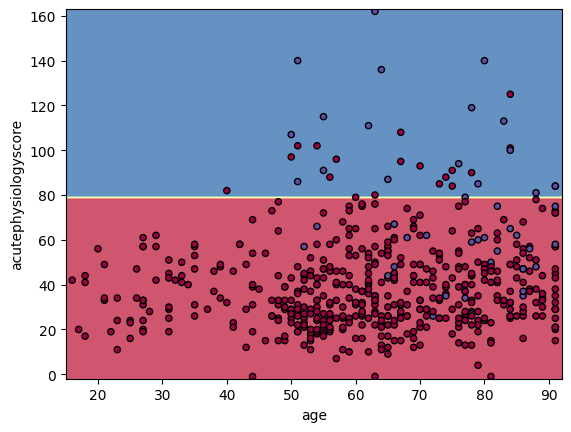

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


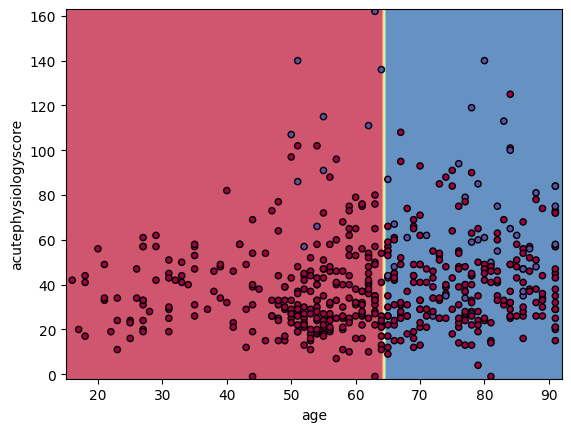

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


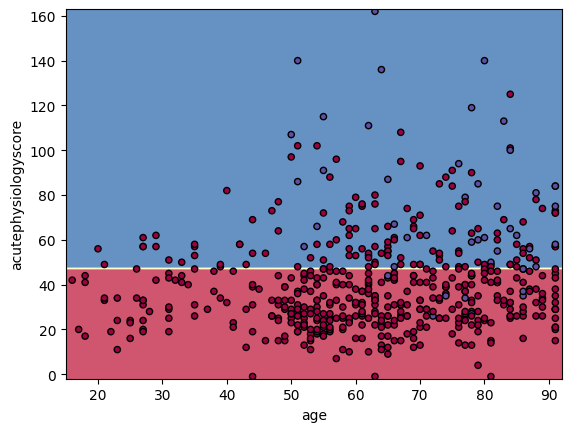

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


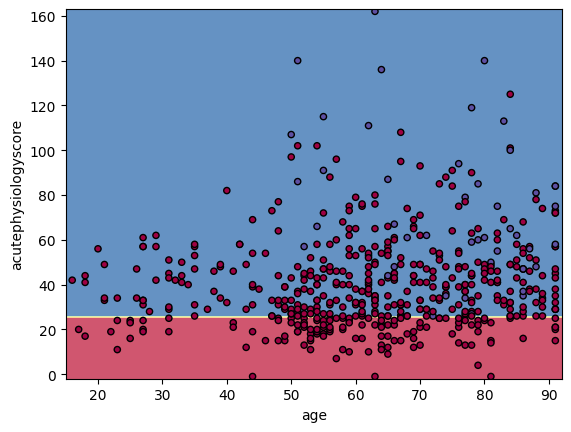

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


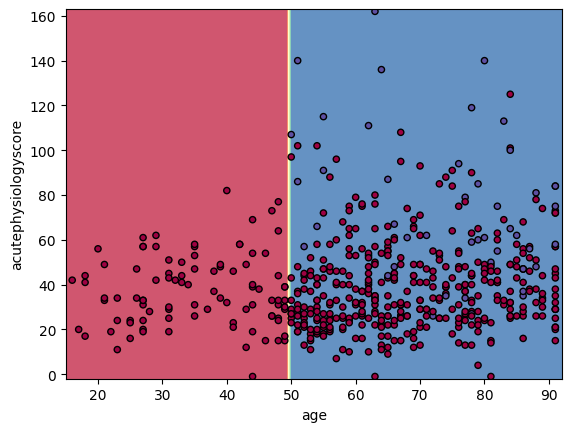

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


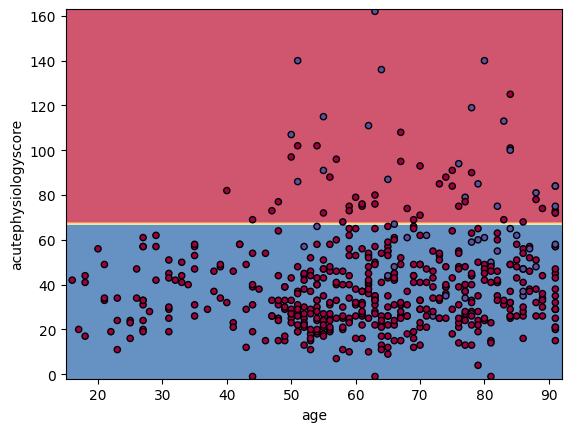

In [35]:
from sklearn import ensemble
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
#from utils import plot_tree_boundaries

# build models with a single split
base_model = AdaBoostClassifier(n_estimators=6)
model = AdaBoostClassifier(estimator=None,
                           n_estimators=6,
                           random_state=2)

model = model.fit(x_train, y_train)

# plot each individual decision tree
#plt.figure(figsize=(12,16))

plt.figure(figsize=(6,6))
for i, estimator in enumerate(model.estimators_):
    # plot tree
    #ax = plt.subplot(6,1,i+1)
    DecisionBoundaryDisplay.from_estimator(estimator, x, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
    #plot_tree_boundaries(estimator, x_train, y_train, feature_names=features, 
    #                              target_names=['Alive', 'Dead'])
    plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
    plt.show()

By inspecting how the decision boundary each time, we can see how incorrectly classified samples are being weighted differently.

**Question:** Does the first tree in the collection (the one in the top left) look familiar to you? Why?

In the second tree we can see the model shift. It misclassified several observations in class 1, and now these are the most important observations. Consequently, it picks the boundary that, while prioritizing correctly classifies these observations, still tries to best classify the rest of the data too. The iteration process continues until the model may be creating boundaries to capture just one or two observations.

One important point is that each tree is weighted by its global error. So, for example, Tree 6 would carry less weight in the final model. It is clear that we wouldn’t want Tree 6 to carry the same importance as Tree 1, when Tree 1 is doing so much better overall. It turns out that weighting each tree by the inverse of its error is a pretty good way to do this.

Let’s look at the decision surface of the final ensemble.

<Figure size 600x600 with 0 Axes>

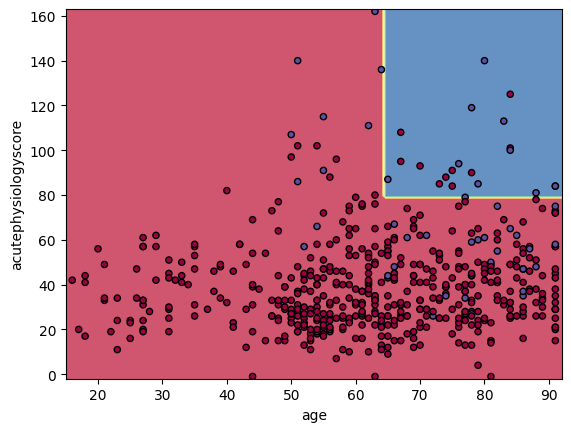

In [37]:
plt.figure(figsize=(6,6))
DecisionBoundaryDisplay.from_estimator(model, x_train, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
#plt.show()

And that’s AdaBoost! There are a few tricks we have glossed over here, but you understand the general principle. We modified the data to focus on hard to classify observations. We can imagine this as a form of data resampling for each new tree.

For example, say we have three observations: A, B, and C, [A, B, C]. If we correctly classify observations [A, B], but incorrectly classify C, then AdaBoost involves building a new tree that focuses on C.

Equivalently, we could say AdaBoost builds a new tree using the dataset [A, B, C, C, C], where we have intentionally repeated observation C 3 times so that the algorithm thinks it is 3 times as important as the other observations. Makes sense?

Now we’ll move on to a different approach that also involves manipulating data to build new trees.

# Bagging
Previously, we saw how one ensembling technique, and how it works by reweighting incorrectly classified samples, such that the ensemble's sub-models place more importance on them.

Bootstrap aggregation, or “Bagging”, is another form of ensemble learning.

- With boosting, we iteratively changed the dataset to have new trees focus on the “difficult” observations. 
- Bagging involves the same approach, except we don’t selectively choose which observations to focus on, but rather we randomly select subsets of data each time.

- **Boosting** aimed to iteratively improve our overall model with new trees.
- With **bagging**, we now build trees on what we hope are independent datasets.

Let’s take a step back, and think about a practical example. Say we wanted a good model of heart disease. If we saw researchers build a model from a dataset of patients from their hospital, we might think this would be sufficient. If the researchers were able to acquire a new dataset from new patients, and built a new model, we’d be inclined to feel that the combination of the two models would be better than any one individually.

- This is the scenario that bagging aims to replicate, except instead of actually going out and collecting new datasets, we instead use **“bootstrapping”** to create new sets of data from our current dataset. 

Let’s take a look at a simple bootstrap model.

**Task:** Use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to train a bagging decision tree with 6 estimators, where the `base_estimator` is a `DecisionTreeClassifier` with `max_depth=5`.

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

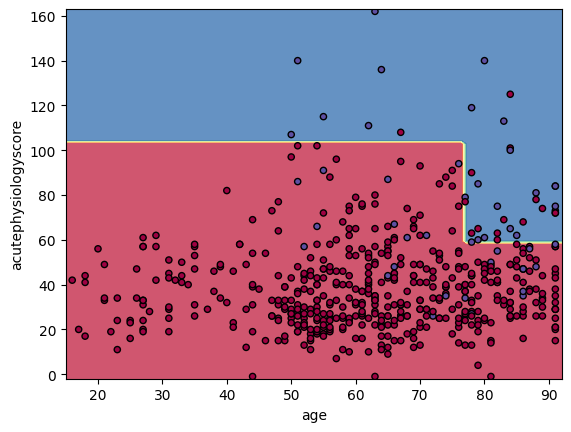

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


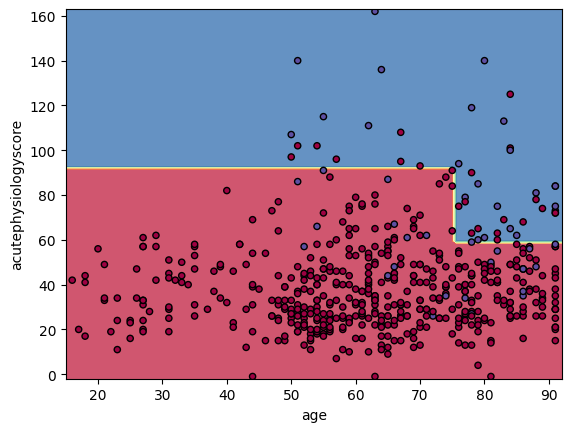

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


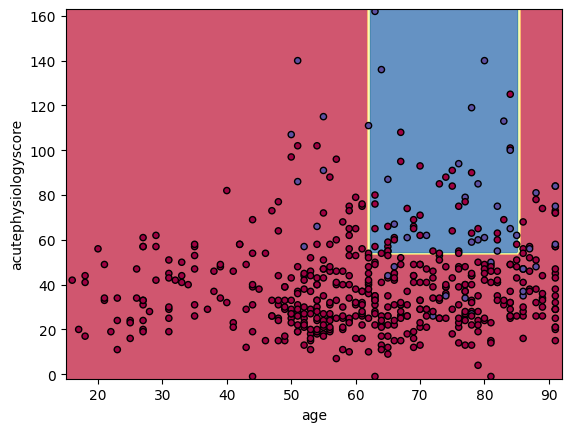

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


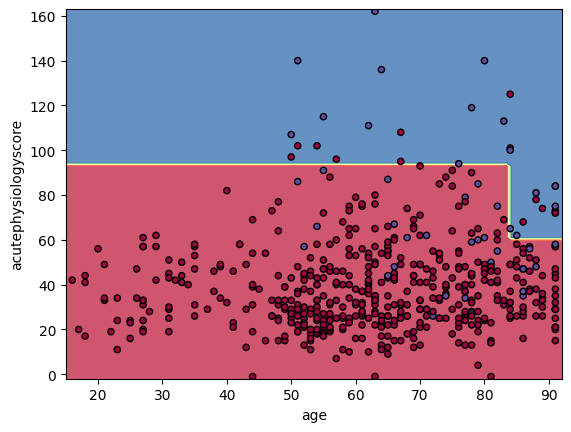

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


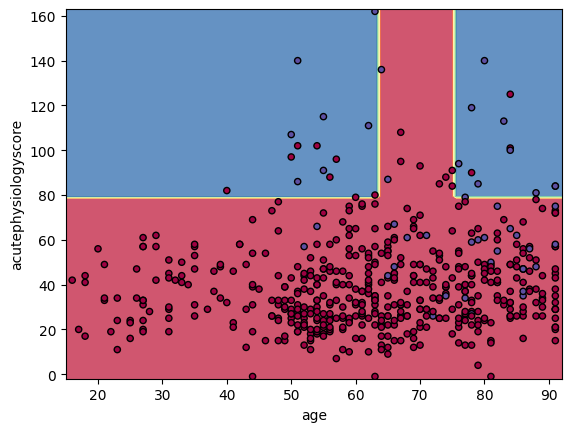

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


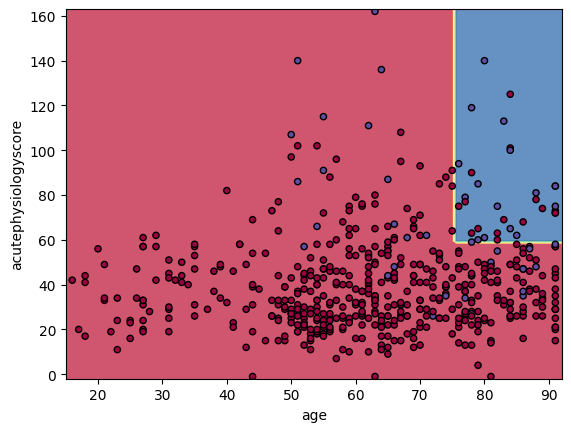

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


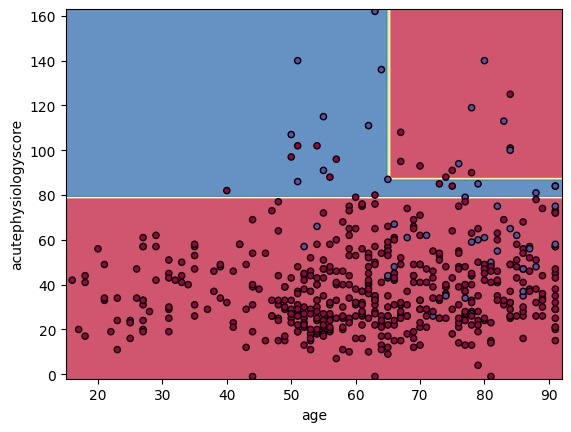

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


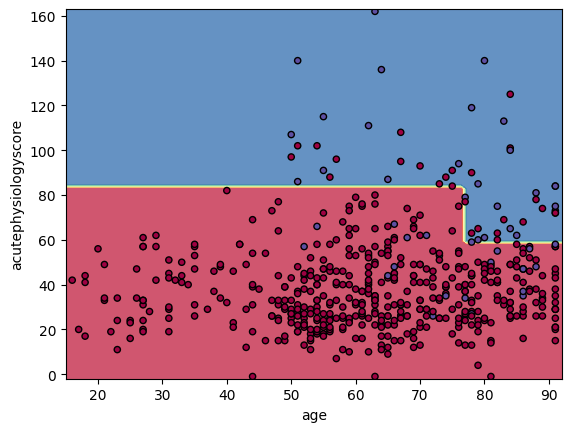

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


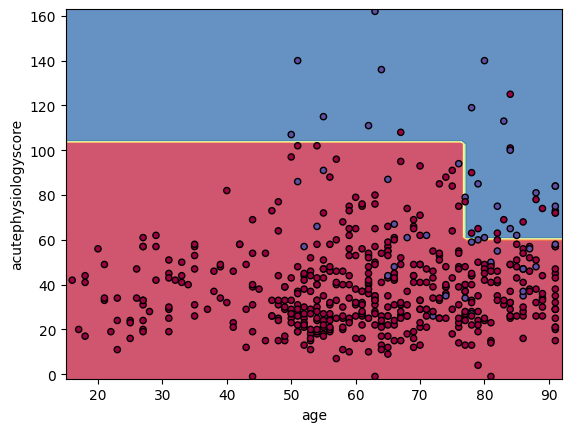

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


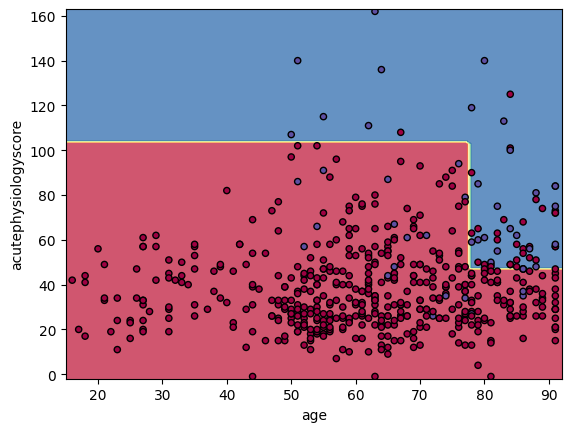

In [40]:
import numpy as np
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier


np.random.seed(321)
tree_model = tree.DecisionTreeClassifier(random_state=42, 
                                    max_depth=3,
                                    min_samples_leaf= 5)

ensemble_model = BaggingClassifier(estimator=tree_model,
                         n_estimators=10, random_state=0)
ensemble_model = ensemble_model.fit(x_train, y_train)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(ensemble_model.estimators_):    
    DecisionBoundaryDisplay.from_estimator(estimator, x, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
    #plot_tree_boundaries(estimator, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])
    plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
    plt.show()

We can see that each individual tree varies considerably. This is a result of using a random set of data to train the classifier.

<Figure size 600x600 with 0 Axes>

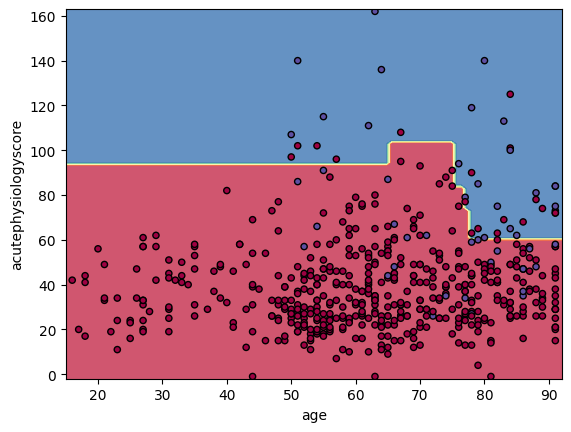

In [41]:
plt.figure(figsize=(6,6))
DecisionBoundaryDisplay.from_estimator(ensemble_model, x_train, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
#plt.show()

Of course, since this is a simple dataset, we are not seeing that many dramatic changes between different models. Don’t worry, we’ll quantitatively evaluate them later.

Next up, a minor addition creates one of the most popular models in machine learning.

# Random Forests

In the previous example, we used bagging to randomly resample our data to generate “new” datasets. The Random Forest takes this one step further: instead of just resampling our data, we also select only a fraction of the features to include.

It turns out that this subselection tends to improve the performance of our models. The odds of an individual being very good or very bad is higher (i.e. the variance of the trees is increased), and this ends up giving us a final model with better overall performance (lower bias).

Much like the boosting technique from earlier, the `sklearn` implementation of random forests do not support missing data. Let's replace all missing data with -1, then train the model.

In [43]:
# Fill missing data with -1
data_no_nans = data.fillna(-1)

x = data_no_nans[features]
y = data_no_nans[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)


**Task:** Use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train a random forest with 6 estimators, max depth of 5 and max features of 1.

In [44]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

np.random.seed(321)
model = RandomForestClassifier(n_estimators=6,
                               max_depth=5, 
                               max_features=1,
                               random_state=2)

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

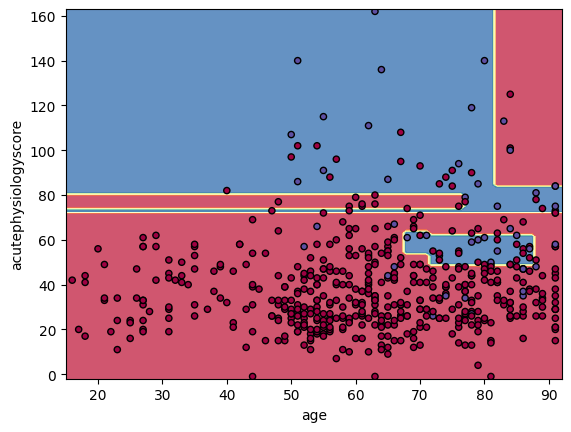

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


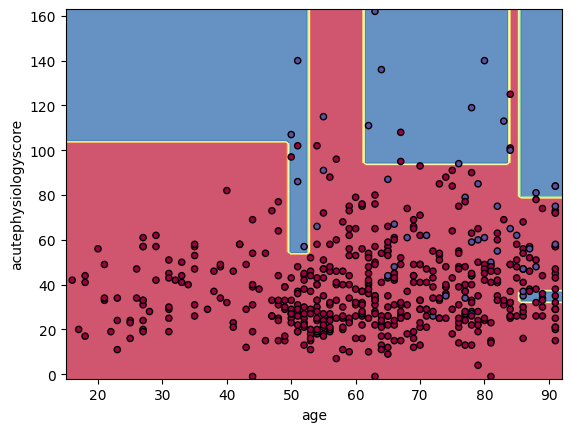

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


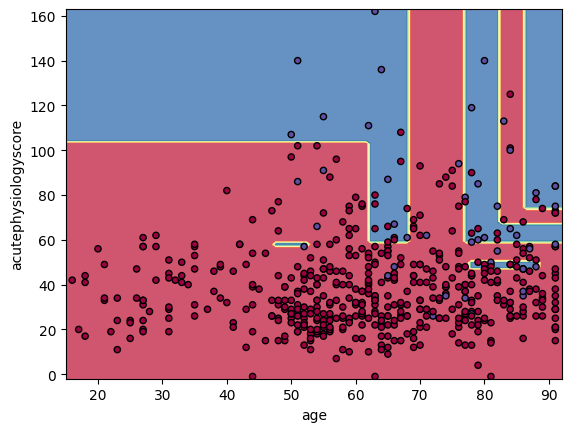

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


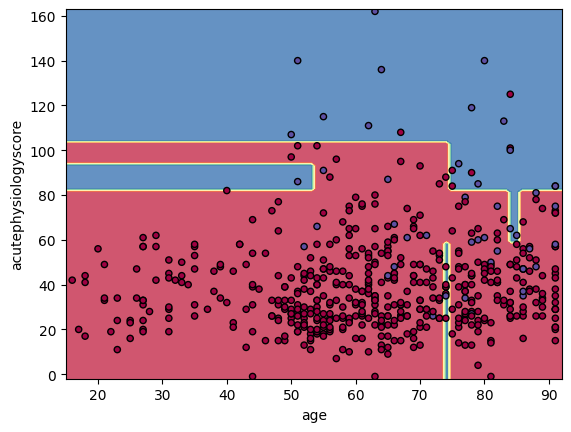

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


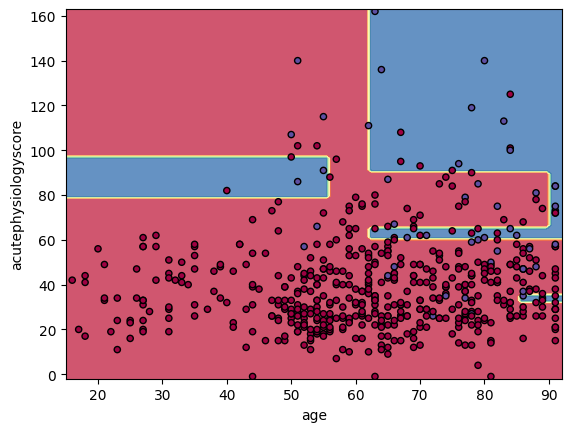

/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


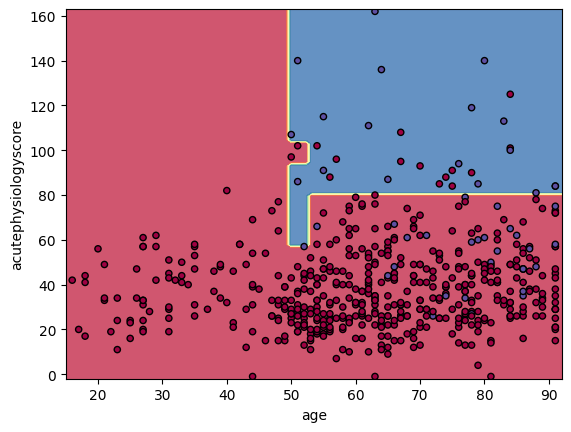

In [48]:
#fit the model
model = model.fit(x_train,y_train)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(model.estimators_):    
    DecisionBoundaryDisplay.from_estimator(estimator, x, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
    #plot_tree_boundaries(estimator, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])
    plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
    plt.show()

Let's also look at the overall final model.

<Figure size 600x600 with 0 Axes>

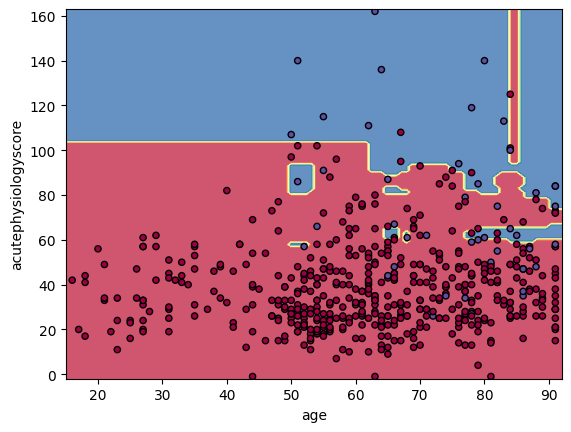

In [49]:
plt.figure(figsize=(6,6))
DecisionBoundaryDisplay.from_estimator(model, x_train, cmap=plt.cm.Spectral, 
                                       response_method="predict", alpha = 0.8)
plt.scatter(x['age'], x['acutephysiologyscore'], c=y, cmap=plt.cm.Spectral , s=20, edgecolor="k")
#plt.show()

Much like the bagging model, this ensembling technique creates a much more complex (and possibly accurate - we'll investigate this later) decision boundary. Random forests are a powerful technique that can be used to achieve state of the art results on some tasks - in particualr, those that involve tabular data.